### Introduction

* Dataset available in scikit-learn
* contains metrics such as population, median income, median housing price, etc.
* sample data are for different block groups which can be treated as districts


### Machine Learning project checklist

* Frame the problem and look at the big picture
* Get the data (scikit-learn)
* Explore the data to gain insights (pandas, matplotlib)
* Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
* Explore different models and short-list the best ones
* Fine-tune your models, adjust parameters and combine them into a solution
* Launch, monitor, maintain the deployed solution

## Frame the problem

Determine whether it is worth investing in a given area or not via predicted housing prices

* Supervised or unsupervised or mixed?
* Classification or Regression or something else?
* Batch learning or online learning?
* Which performance measure?
* Prices into categories like cheap, moderately expensive, expensive?

### Get the Data

May need to deal with relational database, documents, authorization, download, conversions

* http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

* http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

* https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

Optional exercise: write a function to automate retrieving the dataset

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 11

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
housing = pd.read_csv('housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Explore the data

In [14]:
housing.info()
#housing.isnull().any(axis=1)
#housing[housing.isnull().any(axis=1)]
#housing.loc[:, housing.isnull().any(axis=0)]
housing.loc[housing.isnull().any(axis=1), housing.isnull().any(axis=0)]
# How to deal with these missing values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms
290               NaN
341               NaN
538               NaN
563               NaN
696               NaN
...               ...
20267             NaN
20268             NaN
20372             NaN
20460             NaN
20484             NaN

[207 rows x 1 columns]

In [15]:
housing['ocean_proximity'].unique()
housing['ocean_proximity'].value_counts()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype=object)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

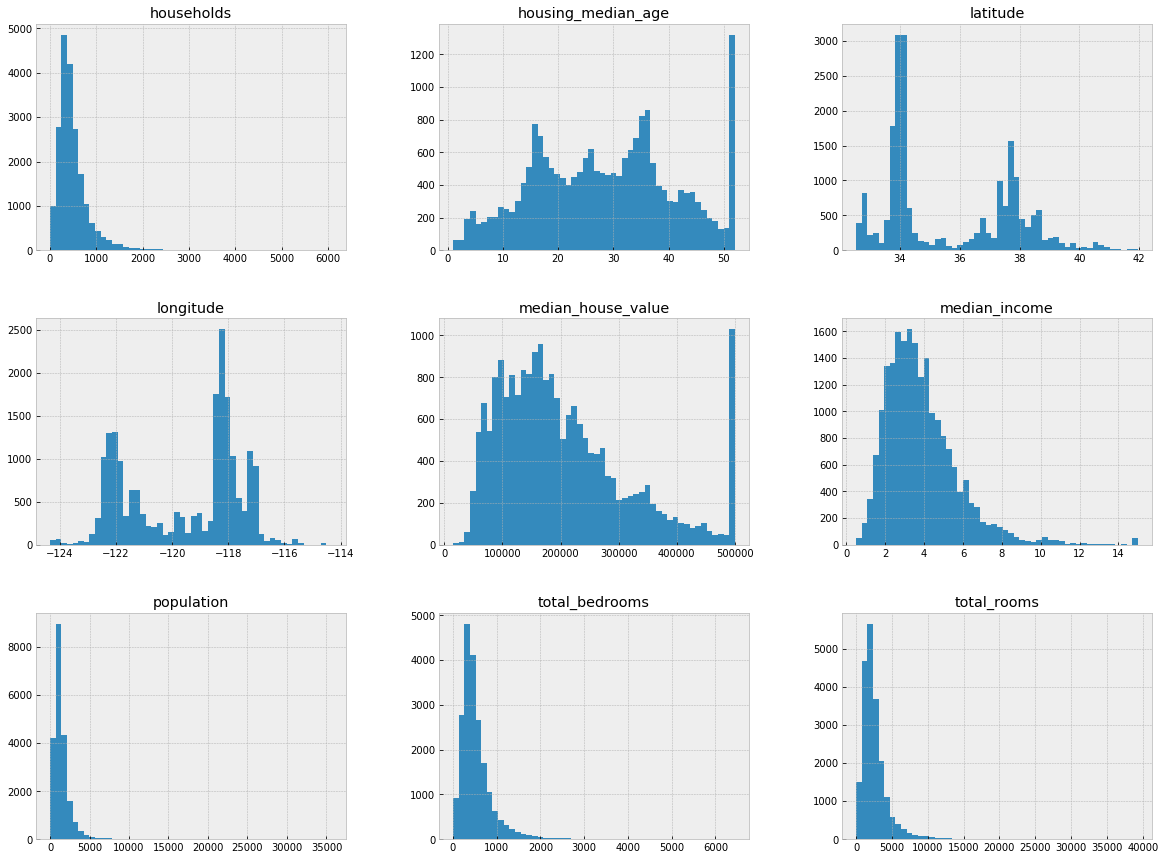

In [17]:
x = housing.hist(bins=50, figsize=(20, 15))

# median income attribute is scaled between 0 to 15?
# max median age 52?
# max median house value $500,000?
# different scales
# positively skewed

In [18]:
# Split the dataset into training and test sets
# 1. Randomised split (works for large datasets)
import sklearn.model_selection as ms
# `random_state` is the seed; use it so that the dataset is split in the same way on every single run
rn_train_set, rn_test_set = ms.train_test_split(housing, test_size = 0.2, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(16512, 10)

(4128, 10)

In [26]:
# 1. Categorised split (might be needed for small datasets)
housing['median_income'].min(), housing['median_income'].max()
# can compute n = (max - min) / (splits + 1), we just use n = 1.5 below
income_categories = housing['median_income'] // 1.5
income_categories.min(), income_categories.max(), income_categories.shape
income_categories.unique().size

# Or use np.ceil or np.floor instead of `//` operator:
# income_categories2 = np.floor(housing['median_income'] / 1.5)
# income_categories2.min(), income_categories2.max(), income_categories2.shape
# income_categories2.unique().size

(0.49990000000000001, 15.0001)

(0.0, 10.0, (20640,))

11

median_income
0.0      815
1.0     6550
2.0     7250
3.0     3652
4.0     1423
5.0      543
6.0      189
7.0      105
8.0       50
9.0       12
10.0      51
dtype: int64

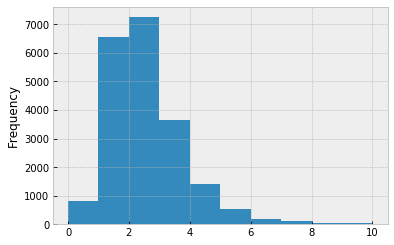

In [20]:
# You can add income_categories as a column in housing dataset
# housing['income_category'] = income_categories

housing.groupby(income_categories).size()
x = income_categories.plot(kind='hist')
# Too few values from 5-10 income categories, so let us put them in one category
# i.e. if income_category of a row is greater than or equal to 5, assign category 5 to it
# why does this cause no problems?

(20640,)

median_income
0.0     815
1.0    6550
2.0    7250
3.0    3652
4.0    1423
5.0     950
dtype: int64

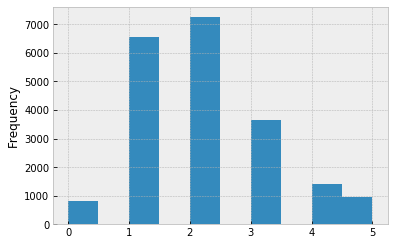

In [27]:
income_categories[income_categories >= 5] = 5
income_categories.shape
housing.groupby(income_categories).size()
x = income_categories.plot(kind='hist')

In [11]:
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.split?

In [12]:
for training_indices, test_indices in split.split(housing, income_categories):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]
stratified_train_set.shape
stratified_test_set.shape

(16512, 10)

(4128, 10)

In [13]:
# measure how close randomised and stratified shuffled splits are in 
# maintaining the income category proportions of the original dataset
h = housing.groupby(income_categories).size() / len(housing)
h.name = 'housing'

#str_train = stratified_train_set.groupby(income_categories).size() / len(stratified_train_set)
#str_train.name = 'stratified train'
str_test = stratified_test_set.groupby(income_categories).size() / len(stratified_test_set)
str_test.name = 'stratified test'

#rn_train = rn_train_set.groupby(income_categories).size() / len(rn_train_set)
#rn_train.name = 'random train'
rn_test = rn_test_set.groupby(income_categories).size() / len(rn_test_set)
rn_test.name = 'random test'

compare = pd.concat([h, str_test, rn_test], axis=1)
compare['stratified test %'] = 100 * (compare['stratified test'] - compare['housing']) / compare['housing']
compare['random test %'] = 100 * (compare['random test'] - compare['housing']) / compare['housing']
compare

housing  stratified test  random test  stratified test %  \
median_income                                                              
0.0            0.039486         0.039486     0.039971           0.000000   
1.0            0.317345         0.317345     0.322674           0.000000   
2.0            0.351260         0.351260     0.359254           0.000000   
3.0            0.176938         0.176841     0.168605          -0.054765   
4.0            0.068944         0.069041     0.064438           0.140548   
5.0            0.046027         0.046027     0.045058           0.000000   

               random test %  
median_income                 
0.0                 1.226994  
1.0                 1.679389  
2.0                 2.275862  
3.0                -4.709748  
4.0                -6.535488  
5.0                -2.105263

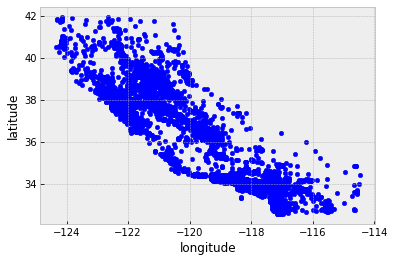

In [14]:
housing = stratified_train_set.copy()
x = housing.plot(kind='scatter', x='longitude', y='latitude')

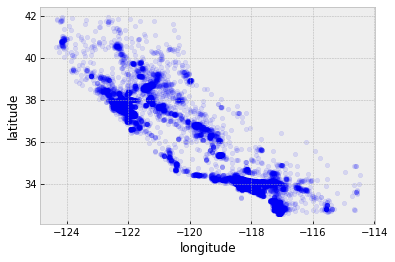

In [15]:
x = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

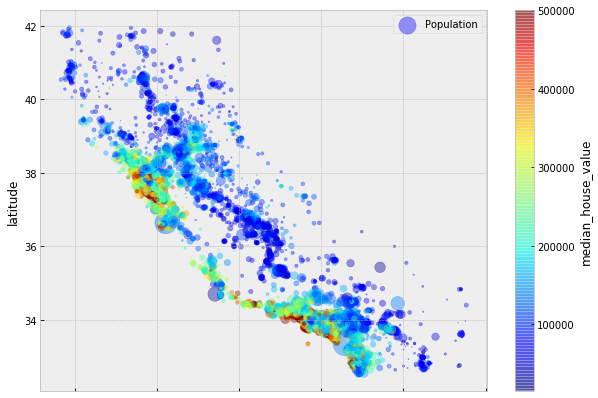

In [16]:
# size of the marker represents population, colour represents median_house_value
x = housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             s=housing['population']/60, 
             label='Population',
             figsize=(10,7),
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)
x = plt.legend()